**Note to grader:** Each question is assigned with a score. The final score  will be (sum of actual scores)/(sum of maximum scores)*100. The grading rubrics are shown in the TA guidelines.

----

<i>General instructions for this and future notebooks:</i>
1. To run a cell and move to the next cell: Hold down <strong>Shift</strong> and press <strong>Enter</strong>
2. To run a cell and stay in the same cell: Hold down <b>Ctrl</b> and press <b>Enter</b>
3. Use the arrow up and down to navigate or do it manually as you prefer
4. Escape from typing a cell: Hit <b>Esc</b>

# **Assignment 2**

This assignment walks you through the basics of linear regression and classification. You will also do some first experiments on a toy data set, and check the effect of hyperparameters. The intended goal of the assignment is to familiarize you further with the Jupyter/Colab environment and help you acquire some tools that we will later use to experiment with 'professional-grade' data sets and algorithms.


<b>Note: </b> You must run/evaluate all cells. <b>Order of cell execution is important.<b>

## <font color='#008DFF'> **Part 1. Practice with linear regression** </font>

### <font color='#008DFF'> **Question 1: Linear regression with numpy 1-liners (5 points)**

> Indented block




In [543]:
# here we initialize a random data matrix X and random numerical labels y
import numpy as np

X = np.random.randn(10,3)
y = np.random.randn(10,1)

# we also initialize a hypothetical hyperplane defined by w and b
w = np.random.randn(1,3)
b = -1


In [544]:
# (i) find the numerical labels predicted by the model (w,b) for the points in X
#     your code should be a single numpy line
#     hint: we wrote this equation for a single point x in class
#           try to generalize it by expressing everying in terms of matrices

# your code goes here
y_predicted = np.dot(X, w.T) + b

# y_predicted =


In [545]:
# (ii) find the updated weights after one application of gradient descent with lr = 0.1
#      your code should be a single numpy line

w_new = w - .1 * (2/len(y) * X.T.dot(y_predicted - y))




In [546]:
# Grader's area

#maxScore += 5
# acturalScore +=


### <font color='#008DFF'> **Question 2: Linear regression model training (10 points)**


(442, 10)


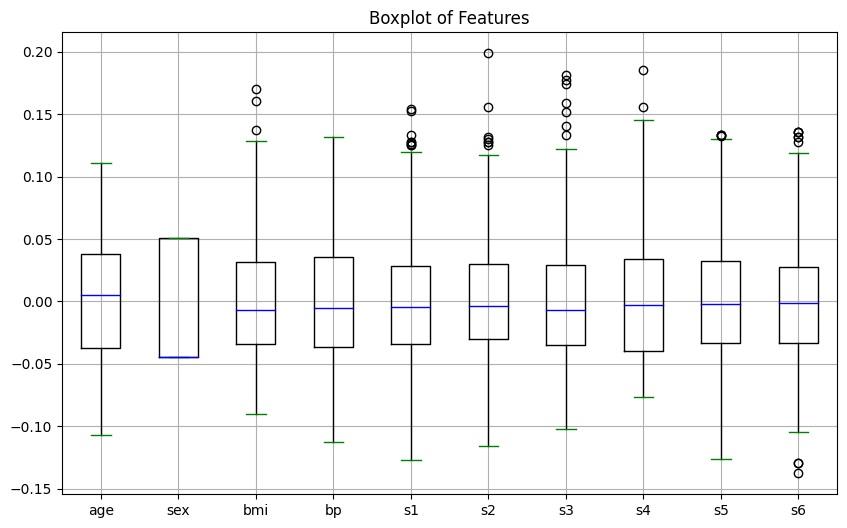

In [547]:
# Load data and visualize features in a boxplot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the diabetes dataset
diabetes = load_diabetes()
X, y, feature_names = diabetes.data, diabetes.target, diabetes.feature_names
df = pd.DataFrame(X, columns=feature_names)
print(X.shape)


# Visualize features in a boxplot
color = {
    "boxes": "k",
    "whiskers": "k",
    "medians": "b",
    "caps": "green",
}

# Create a boxplot for each feature
plt.figure(figsize=(10, 6))
df.boxplot(color=color)
plt.title('Boxplot of Features')
plt.show()





In [548]:
# Splitting data into train and test (80% train, 20% test). Print train and test data shape.

from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)






Training set shape: (353, 10) (353,)
Testing set shape: (89, 10) (89,)


In [549]:
# feature scaling and standarization for X_train, X_test. Fit on X_train, transform on X_test.

from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on the training set
scaler.fit(X_train)

# Transform both the training and testing sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [550]:
# Train and evaluate a linear regression model using LinearRegression on scaled features. Print mse, model coefficients, and model intercept
from sklearn.linear_model import LinearRegression

# Initialize the LinearRegression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)








# Print mse, model coefficients, and model intercept
# Your code goes here.
# Print the mean squared error
print("Mean Squared Error:", mse)

# Print the model coefficients
print("Model Coefficients:", model.coef_)

# Print the model intercept
print("Model Intercept:", model.intercept_)




Mean Squared Error: 3808.1422988200447
Model Coefficients: [ -2.18293221 -12.48833835  27.72694584  13.61882011 -18.78018409
  10.13382984  -6.6330229   -1.37075132  31.37409036   4.21029858]
Model Intercept: 153.17563739376772


In [551]:
# Grader's area

maxScore += 10
# acturalScore +=


## <font color='#008DFF'> **Part 2. Practice with linear classification** </font>

### <font color='#008DFF'> Preparation Steps

In [552]:
# Import all necessary python packages
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [553]:
# Load data
from sklearn import datasets

# load iris dataset
iris = datasets.load_iris()
# Since this is a bunch, create a dataframe
df=pd.DataFrame(iris.data)
df['4']=iris.target
# {0:'setosa', 1:'versicolor', 2:'virginica'}
# df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'target']


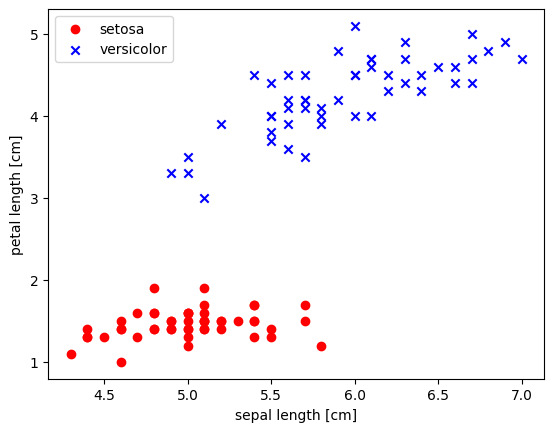

In [554]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 0, -1, 1)

# extract sepal length and petal length
X = df.iloc[:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


#plt.savefig('images/02_06.png', dpi=300)
plt.show()

-----------------------
-----------------------
-----------------------



### <font color='#008DFF'> **Question 1. Manual Perceptron Training (10 points)**

In [555]:
'''
this code was used to check the math for the weights, however it used in the run all it messed up all later calculations

import numpy as np

# Initialize weights and learning rate
w0, w1, w2 = 0.1, 0.2, -0.1
eta = 0.1

# Define the input data and the actual output
X = np.array([[5.1, 1.4], [4.9, 1.4], [4.7, 1.3], [4.6, 1.5], [5.0, 1.4]])
y = np.array([-1, -1, -1, -1, -1])
print(f'The starting weights are: w0={w0}, w1={w1}, w2={w2}')

# Process the first three data points
for i in range(3):
    x1, x2 = X[i]
    y_actual = y[i]

    # Calculate the predicted output
    y_pred = np.sign(w0 + w1*x1 + w2*x2)

    # Update the weights
    w0 = w0 + eta*(y_actual - y_pred)
    w1 = w1 + eta*(y_actual - y_pred)*x1
    w2 = w2 + eta*(y_actual - y_pred)*x2
    print(f'Updated weights after processing data point {i} are: w0={w0}, w1={w1}, w2={w2}')

# Print the updated weights
print(f'Updated weights after processing data points 0, 1, 2 are: w0={w0}, w1={w1}, w2={w2}')
'''



"\nthis code was used to check the math for the weights, however it used in the run all it messed up all later calculations\n\nimport numpy as np\n\n# Initialize weights and learning rate\nw0, w1, w2 = 0.1, 0.2, -0.1\neta = 0.1\n\n# Define the input data and the actual output\nX = np.array([[5.1, 1.4], [4.9, 1.4], [4.7, 1.3], [4.6, 1.5], [5.0, 1.4]])\ny = np.array([-1, -1, -1, -1, -1])\nprint(f'The starting weights are: w0={w0}, w1={w1}, w2={w2}')\n\n# Process the first three data points\nfor i in range(3):\n    x1, x2 = X[i]\n    y_actual = y[i]\n\n    # Calculate the predicted output\n    y_pred = np.sign(w0 + w1*x1 + w2*x2)\n\n    # Update the weights\n    w0 = w0 + eta*(y_actual - y_pred)\n    w1 = w1 + eta*(y_actual - y_pred)*x1\n    w2 = w2 + eta*(y_actual - y_pred)*x2\n    print(f'Updated weights after processing data point {i} are: w0={w0}, w1={w1}, w2={w2}')\n\n# Print the updated weights\nprint(f'Updated weights after processing data points 0, 1, 2 are: w0={w0}, w1={w1}, w2={

Below you can see the first 5 data points of the data set, all labeled as 'setosa'.

In [556]:
X[0:5], y[0:5]

(array([[5.1, 1.4],
        [4.9, 1.4],
        [4.7, 1.3],
        [4.6, 1.5],
        [5. , 1.4]]),
 array([-1, -1, -1, -1, -1]))

Suppose the initial weights of the perceptron are w0=0.1, w1=0.2, w2=-0.1 . Here $w_0$ is the bias.

In the following space (Double click this text), write the weights after processing data points 0,1,2, and show your calculations (with $\eta = 0.1$):

w0 + w1 x1 + w2 x2 = 0.1 + 0.2*5.1 - 0.1*1.4

w2 := w2 + \eta(y - y_hat)*x2
w1 := w1 + \eta(y - y_hat)*x1
w0 := w0 + \eta(y - y_hat)

code above confirms math

Data Point 0:
x0 = [5.1, 1.4]
z = w0 * x0 + w1 * x01 + w2 * x02 = 0.1 * 1 + 0.2 * 5.1 - 0.1 * 1.4 = 0.98
z = 0.98 >= 0 means y_hat = 1

w0 := w0 + η(y - y_hat) * x0 = 0.1 + 0.1(-1 - 1) * 1 = -0.1
w1 := 0.2 + 0.1(-2) * 5.1 = -0.82
w2 := -0.1 + 0.1(-2) * 1.4 = -0.38

w = [-0.1, -0.82, -0.38]

Data Point 1:
x1 = [4.9, 1.4]
z = -0.1 - 0.82(4.9) - 0.38(1.4) = -4.65 -> y_hat = -1

w0 := -0.1 + 0 = -0.1
w1 := -0.82 + 0 = -0.82
w2 := -0.38 + 0 = -0.38

Data Point 2:
 x2 = [4.7, 1.4]

z = -0.1 - 0.82(4.7) - 0.38(1.4) = -4.486 -> y_hat = -1

w0 := -0.1 + 0 = -0.1
w1 := -0.82 + 0 = -0.82
w2 := -0.38 + 0 = -0.38

<br>
<br>
<br><br><br><br>












In [557]:
# Grader's area
import numpy as np
maxScore = 0

maxScore += 10
# acturalScore +=

-----------------------
-----------------------
-----------------------


### <font color='#008DFF'> **Question 2. Perceptron Code Modification (15 points)**

The following code is a perceptron implementation (with three do-nothing lines 59-61).

In [558]:
import numpy as np

class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
                # Iteration count for training
        self.iter_ = 0 #my code

        # Weight history
        self.history = []#my code
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        # Initialize a list to store the weights history
        self.w_history_ = [self.w_.copy()]  # my code

        self.iter_ = 0  # my code

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)

                # Append the updated weights to the history
                self.w_history_.append(self.w_.copy())  # my code

            self.errors_.append(errors)

            # my code: if no errors in the last iteration, stop updating
            if errors == 0:
                break
            self.iter_ += 1  # my code

        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)



Work on the above cell and modify the code so that:

(i) The fit function stops when no more iterations are necessary. <br>
(ii) The trained perceptron contains as an attribute not only its weights, but also the number of iterations it took for training <br>
(iii) The perceptron maintains a history of its weights, i.e. the set of weights after each point is processed.

To modify the code please insert your code with clear comments surrounding it, similarly to "my do-nothing code". Make sure you evaluate the cell again,  so that following cells will be using the modified perceptron.



In [559]:
# Grader's area

maxScore += 15
# acturalScore +=

-----------------------
-----------------------
-----------------------


### <font color='#008DFF'> **Question 3: Experimenting with hyperparameters (15 points)**

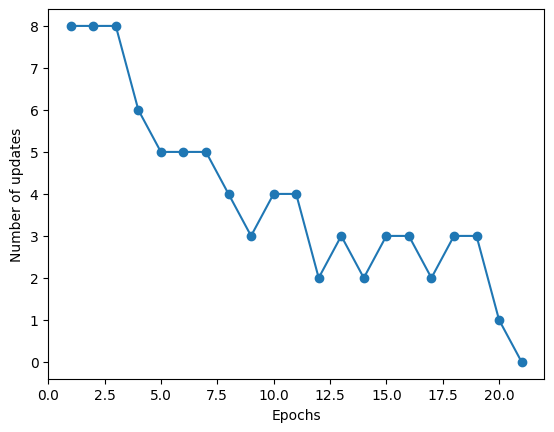

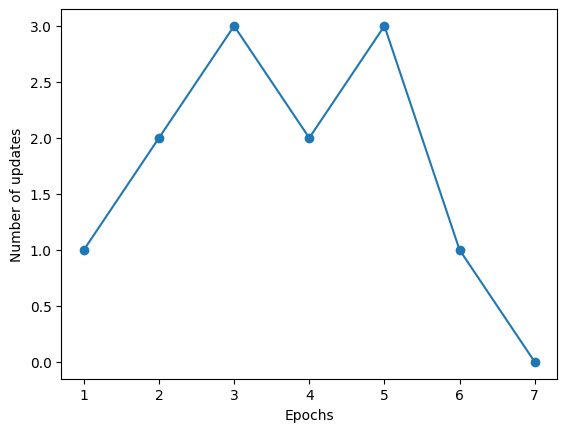

In [573]:
# Graph 1: random_state = 1, η = 0.001
ppn = Perceptron(eta= 0.001, n_iter=20, random_state=1)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')


plt.show()


# Graph 2: random_state = 2, η = 0.001
ppn2 = Perceptron(eta=0.001, n_iter=20, random_state=2)

ppn2.fit(X, y)

plt.plot(range(1, len(ppn2.errors_) + 1), ppn2.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')


plt.show()



Running the above code, you can verify if your modification in question 1 works correctly. The point of this question is to experiment with the different hyperparameters. Here are some specific questions:<br>
(i) Find the largest value of $\eta$ for which the process takes more than 20 iterations to converge. Explain how you found that $\eta$ <br>
(ii) Are you able to find $\eta>1$ for which the process fails to converge in less than 30 iterations? <br>
(iii) Find two different settings for the random state, that give different convergence patterns, for the same $\eta$.

Please give your answers in the cell below.

<br>Double click here to type your answer
<br>
<br>(i) This was a trial and error problem for me. I had a large number of iterations and just kept slowly decreasing η till I found the largest. The largest value of η for which the process took more than 20 iterations to converge was appromiately 0.000051.

(ii)There is no η > 1 where the process fails to converge in less than 30 iterations. It always converges in 6 iterations.

(iii) Code above shows two graph with one convergence in 6 iterations, whereas the second graph with converges at 7 iterations and both have the same η but different random states. There is also a non-graph solution found below that shows they aren't the same.
<br>
<br>

In [561]:
# Question 3
# Initialize variables
eta = 0.01
random_state1 = 1
random_state2 = 2

# Create two Perceptron objects with different random states
p1 = Perceptron(eta=eta, n_iter=1000, random_state=random_state1)
p2 = Perceptron(eta=eta, n_iter=1000, random_state=random_state2)

# Fit the perceptrons
p1.fit(X, y)
p2.fit(X, y)

# Compare the weight histories
if not np.array_equal(p1.w_history_, p2.w_history_):
    print("The two settings for the random state give different convergence patterns.")
else:
    print("The two settings for the random state give the same convergence patterns.")


The two settings for the random state give different convergence patterns.


In [562]:
# Grader's area

maxScore += 15
# acturalScore +=

-----------------------
-----------------------
-----------------------


### <font color='#008DFF'> **Question 4: Visualizing multiple decision regions over time (10 points)**

Here is the function for visualizing decision regions

In [563]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

This is epoch 0


<ipython-input-563-2dba8886e370>:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


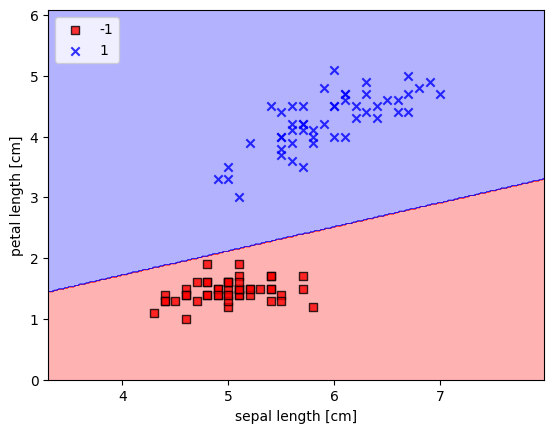

This is epoch 1


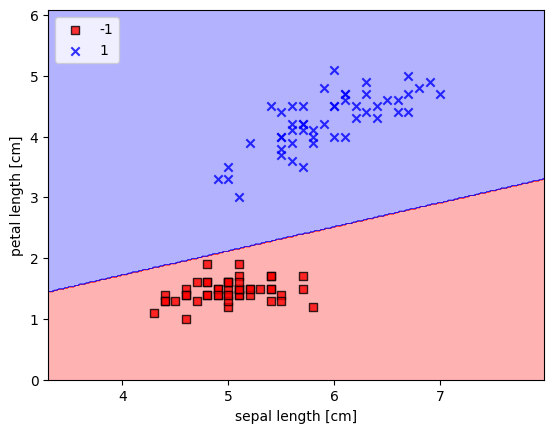

This is epoch 2


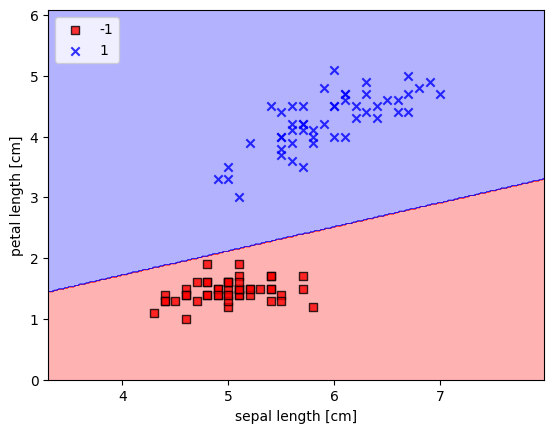

This is epoch 3


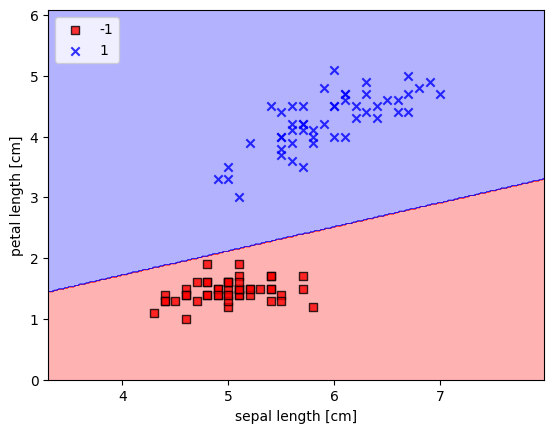

This is epoch 4


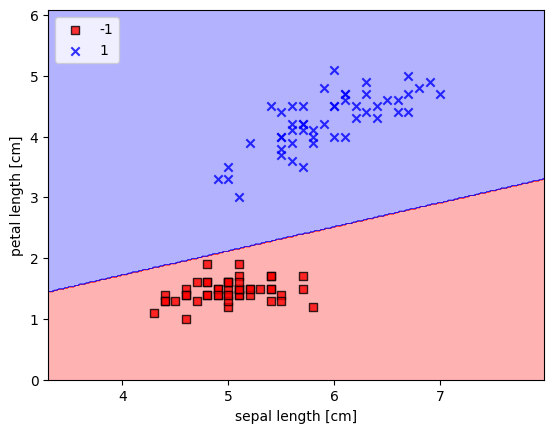

In [564]:
ppn = Perceptron(eta=0.01, random_state=1)
for _ in range(5):
    ppn=ppn.fit(X, y)
    print(f'This is epoch {_}')
    # Plot the decision regions after each epoch
    plot_decision_regions(X, y, classifier=ppn)
    plt.xlabel('sepal length [cm]')
    plt.ylabel('petal length [cm]')
    plt.legend(loc='upper left')
    plt.show()


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

Using the above, give code that plots the decision regions for the first 5 epochs. Use learning rate = 0.01 and random seed = 1 when applicable.

In [565]:
#
#
#

In [566]:
# Grader's area

maxScore += 10
# acturalScore +=


-----------------------
-----------------------
-----------------------


### <font color='#008DFF'> **Question 5: Changing the data order in training (15 points)**



The data arrays (X,y) currently in the memory are organized so that the all data points with a given label (e.g. 'Setosa') lie in a contiguous part of the arrays (X,y). In this question we will check the impact of changing the order of the data in the number of iterations required to learn a correct perceptron.


The commented code below needs a small change in order to generate a random shuffle (also called permutation) of the data). Please look up the particular functions of the code, see how they work and then do the required modification and uncomment/evaluate the code.

In [567]:
# establish a random shuffle
# s = np.arange(10)
# np.random.shuffle(s)
# shuffle sample
# X_shuffle = X[s];
# y_shuffle = y[s];
s = np.arange(X.shape[0])
np.random.shuffle(s)

# Shuffle sample
X_shuffle = X[s]
y_shuffle = y[s]
print(s)

[49 54 48 55 92 59 16  2 86 91 37 52 68  9 99 72 77 38 44 41 43 22 42 63
 13 79 83  6 20 28  5 47 90 17 62 80 66 46 30  8 10 45 14 76 29  3 71 85
 82 57 40 31 89 78 94  1 36 53 60 15 93 39 33 73 51 70 23 98 56 96 11 81
 12 67 75 25 84 21 19 74 24 95 97 32 69 35 88 87 34  7 27 18 65 61  4 26
 50 58 64  0]


Modify the code below as follows: <br>
(i) Pick a sufficiently small $\eta$ so that convergences takes 20 iterations or more <br>
(ii) Add an extra line that fits the perceptron on the shuffled data <br>
(iii) Plot the error for both training processes (the original, and the shuffled ata)

What do you observe?

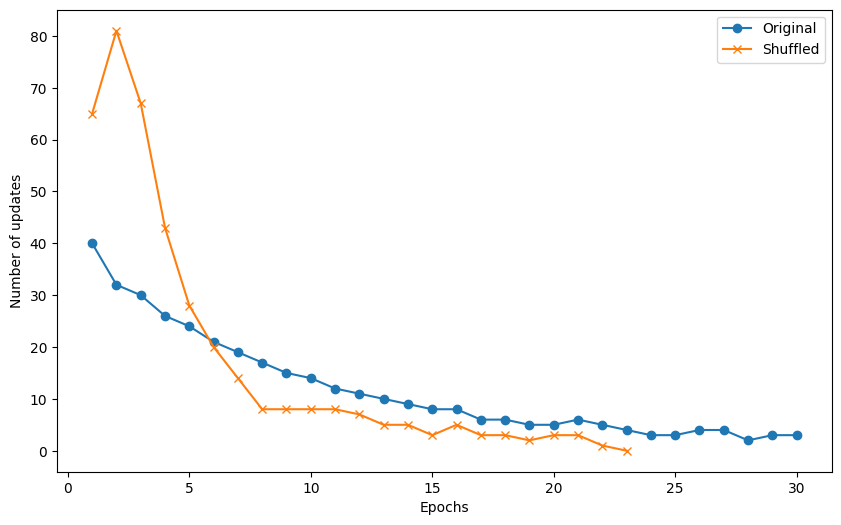

In [568]:
# (i) Pick a sufficiently small η so that convergences takes 20 iterations or more
# Initialize the Perceptron with a small learning rate
ppn3 = Perceptron(eta= 0.00001, n_iter=30, random_state=1)
ppn4 = Perceptron(eta= 0.00001, n_iter=30, random_state=1)

# Fit the perceptron on the original data
ppn3.fit(X, y)
# (ii) Add an extra line that fits the perceptron on the shuffled data
ppn4.fit(X_shuffle, y_shuffle)
# Store the errors for later comparison
errors_original = ppn3.errors_
errors_shuffled = ppn4.errors_


# (iii) Plot the error for both training processes (the original, and the shuffled data)
plt.figure(figsize=(10, 6))

# Plot the errors for the original data
plt.plot(range(1, len(errors_original) + 1), errors_original, marker='o', label='Original')

# Plot the errors for the shuffled data
plt.plot(range(1, len(errors_shuffled) + 1), errors_shuffled, marker='x', label='Shuffled')

plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.legend()

plt.show()



(i) η = 0.00001
(ii) and (iii) The blue line is the original data and orange line is the shuffled data--
The shuffled data had a higher number of updates at the start but converged faster than the unshuffled.

<br>
<br>
<br>

In [569]:
# Grader's area

maxScore += 15
# acturalScore +=

-----------------------
-----------------------
-----------------------
